2.	An online car sales platform would like to improve its customer base and their experience by providing them an easy way to buy and sell cars. For this, they would like to have an automated model which can predict the price of the car once the user inputs the required factors. Help the business achieve the objective by applying Lasso and Ridge Regression on it. Please use the below columns for the analysis: Price, Age_08_04, KM, HP, cc, Doors, Gears, Quarterly_Tax, Weight.

In [1]:
# Importing libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import pylab
import scipy
import warnings
warnings.filterwarnings(action='ignore',category=UserWarning)
pd.set_option('display.max_columns', 500)

In [2]:
# Importing dataset
data = pd.read_csv('C:/Users/vaibh/Desktop/360 Digitmg/Multiple Regression\Assignments/ToyotaCorolla.csv',encoding='latin1')
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0


In [3]:
# checking dimensions of the dataset
data.shape

(1436, 38)

In [4]:
# checking for null values
data.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

There are no null values

In [5]:
# checking for duplicate value
data.duplicated().sum()

0

There are no duplicate values

In [6]:
# Descriptive statistics of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1436.0,721.555014,416.476890,1.0,361.75,721.5,1081.25,1442.0
Price,1436.0,10730.824513,3626.964585,4350.0,8450.00,9900.0,11950.00,32500.0
Age_08_04,1436.0,55.947075,18.599988,1.0,44.00,61.0,70.00,80.0
Mfg_Month,1436.0,5.548747,3.354085,1.0,3.00,5.0,8.00,12.0
Mfg_Year,1436.0,1999.625348,1.540722,1998.0,1998.00,1999.0,2001.00,2004.0
KM,1436.0,68533.259749,37506.448872,1.0,43000.00,63389.5,87020.75,243000.0
HP,1436.0,101.502089,14.981080,69.0,90.00,110.0,110.00,192.0
Met_Color,1436.0,0.674791,0.468616,0.0,0.00,1.0,1.00,1.0
Automatic,1436.0,0.055710,0.229441,0.0,0.00,0.0,0.00,1.0
cc,1436.0,1576.855850,424.386770,1300.0,1400.00,1600.0,1600.00,16000.0


In [7]:
# Info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [8]:
# Checking for columns in the dataset
data.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [9]:
# Dropping irrelevant features
data.drop(columns= ['Id','Model'], inplace=True)

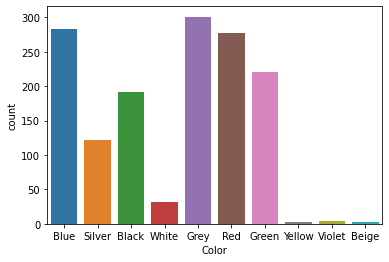

In [10]:
# Countplot for features
sns.countplot(x = data.Color)
plt.show()

Grey color and blue color cars are most sold

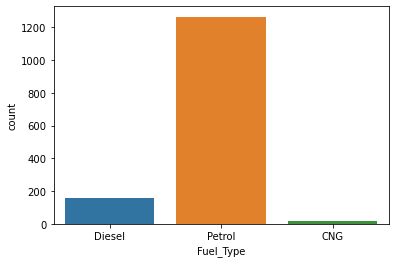

In [11]:
# Countplot for features
sns.countplot(x = data.Fuel_Type)
plt.show()

Petrol cars are the most in the dataset

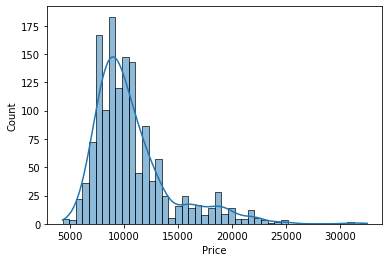

In [12]:
# Plotting histogram to check distribution of the features

sns.histplot(data.Price,kde=1);
plt.show()

The Price feature data is right skewed

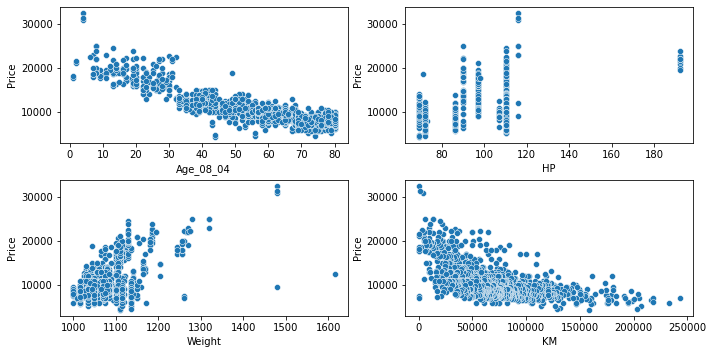

In [13]:
# Scatter plot 
fig,axes = plt.subplots(2,2,figsize=(10,5))
axes = axes.flatten()
index = 0
for col in ['Age_08_04', 'HP', 'Weight', 'KM']:
    sns.scatterplot(y = data.Price, x = data[col],ax=axes[index])
    index += 1
plt.tight_layout(w_pad = 0.5, h_pad = 0.5, pad= 1)

In [14]:
# Converting categorical to numerical data

data = pd.get_dummies(columns=['Color','Fuel_Type'], data = data, drop_first=True)

In [15]:
data.head(5)

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Color_Black,Color_Blue,Color_Green,Color_Grey,Color_Red,Color_Silver,Color_Violet,Color_White,Color_Yellow,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,10,2002,46986,90,1,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [16]:
# Splitting into independent and dependent features

x = data.drop(['Price'],axis = 1)
y = data.Price

In [17]:
# Checking for multi-collinearity 

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

x = add_constant(x)
vif = pd.DataFrame()
vif['variables'] = x.columns

vif['vif'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

x_vif = vif[vif.vif < 10] # Using only variables with vif values less than 10

x_vif

E:\ANACONDA\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
E:\ANACONDA\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,variables,vif
3,KM,2.123868
4,HP,2.584816
5,Met_Color,1.306321
6,Automatic,1.126106
7,cc,1.261477
8,Doors,1.370331
9,Cylinders,0.000000
10,Gears,1.290423
11,Quarterly_Tax,5.249159
12,Weight,4.279037


The VIF for the features having value less than 10, have no collinearity, whereas values greater than 10 are collinear and can be dropped.

In [18]:
# Cretaing new independent variables dataframe with significant features
columns = x_vif.variables.values
X = x[columns]

# Train Test Split

In [19]:
# Using train test split

from sklearn import model_selection

X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X, y, test_size = 0.25)

In [20]:
# Shape of train test data
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1077, 30), (359, 30), (1077,), (359,))

# Normalization

In [21]:
# Normalizing the data
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

mms_X_train = mms.fit_transform(X_train)
mms_X_test = mms.transform(X_test)

In [22]:
# Fitting the train data to the model
import statsmodels.api as sm

mms_X_train = sm.add_constant(mms_X_train)
mms_X_test = sm.add_constant(mms_X_test)

best_model = sm.OLS(Y_train, mms_X_train).fit()

In [23]:
# Summary of the model
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:15:18   Log-Likelihood:                -9360.5
No. Observations:                1077   AIC:                         1.878e+04
Df Residuals:                    1047   BIC:                         1.893e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8011.3581    642.511     12.469      0.000    6750.601    9272.115
x1         -7835.8788    344.788    -22.727      0.000   -8512.433   -7159.325
x2           949.4755    468.216      2.028      0.043      30.727    1868.224
x3           -57.1211    101.008     -0.566      0.572    -255.323     141.081
x4           -44.7245    201.045     -0.222      0.824    -439.221     349.772
x5         -1545.3108   1498.629     -1.031      0.303   -4485.969    1395.347
x6           101.6893    160.019      0.635      0.525    -212.305     415.683
x7         -1.941e-11   1.21e-12    -15.996      0.000   -2.18e-11    -1.7e-11
x8           797.8546    788.331      1.012      0.312    -749.035    2344.744
x9          1807.2052    499.550      3.618      0.000     826.972    2787.438
x10         1.224e+04    982.962     12.450      0.000    1.03e+04    1.42e+04
x11          409.2635     98.995      4.134      0.000     215.012     603.516
x12          196.6676    171.651      1.146      0.252    -140.152     533.487
x13         5124.8014    611.315      8.383      0.000    3925.259    6324.344
x14          523.0267    164.255      3.184      0.001     200.719     845.334
x15          324.5231    326.876      0.993      0.321    -316.884     965.931
x16          178.5690    172.844      1.033      0.302    -160.592     517.730
x17          632.6022    118.537      5.337      0.000     400.005     865.200
x18         3875.8522    255.693     15.158      0.000    3374.124    4377.581
x19         1650.8257    132.167     12.490      0.000    1391.483    1910.168
x20          665.8436    128.930      5.164      0.000     412.853     918.834
x21          -26.2161    192.986     -0.136      0.892    -404.900     352.467
x22          672.2322    191.527      3.510      0.000     296.411    1048.053
x23         -270.8653    378.264     -0.716      0.474   -1013.108     471.377
x24         -569.0319    143.521     -3.965      0.000    -850.654    -287.410
x25          307.8479    118.182      2.605      0.009      75.948     539.748
x26         -195.0459    164.752     -1.184      0.237    -518.329     128.237
x27          177.5965    130.570      1.360      0.174     -78.611     433.805
x28         -411.5090    105.391     -3.905      0.000    -618.311    -204.707
x29         -477.7002    868.578     -0.550      0.582   -2182.053    1226.652
x30          309.4602   1477.512      0.209      0.834   -2589.761    3208.681
==============================================================================
Omnibus:                       73.893   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              306.360
Skew:                           0.141   Prob(JB):                     2.98e-67
Kurtosis:                       5.598   Cond. No.                     1.09e+16
==

Certain variables can be seen having p-values greater than 0.05

Removing these variables as these do not contribute to predict the price of the car 

In [24]:
# Predicting for test data
from sklearn.metrics import r2_score
best_pred_test = best_model.predict(mms_X_test)

# RMSE Error calculation for test data

res_test = Y_test - best_pred_test
rmse_test = np.sqrt(np.mean(res_test * res_test))

r2_score_test = r2_score(Y_test,best_pred_test)  
print(f'\nR2-score value for test data : {r2_score_test}')
print(f'\nRMSE for test data : {rmse_test}')

print('------------------------------------------------------------------------')

# Predicting for train data
best_pred_train = best_model.predict(mms_X_train)

# RMSE Error calculation for train data

res_train = np.array(Y_train) - best_pred_train
rmse_train = np.sqrt(np.mean(res_train * res_train))

r2_score_train = r2_score(Y_train, best_pred_train)  
print(f'\nR2-Score value for train data : {r2_score_train}')
print(f'\nRMSE for train data : {rmse_train}')


R2-score value for test data : 0.8086045559709109

RMSE for test data : 1716.0477571142198
------------------------------------------------------------------------

R2-Score value for train data : 0.8325018674906765

RMSE for train data : 1439.92859702064


In [25]:
# Checking which variables have pvalue greater than 0.05
best_model.pvalues.index[best_model.pvalues > 0.05]

Index(['x3', 'x4', 'x5', 'x6', 'x8', 'x12', 'x15', 'x16', 'x21', 'x23', 'x26',
       'x27', 'x29', 'x30'],
      dtype='object')

In [26]:
# Creating new dataframe without insignificant variables
list1 = [2,3,5,7,14,15,20,22,24,25,28,29]
X_new = pd.DataFrame([])
for i in range(X.shape[1]):
    if i not in list1:
        col = X.columns[i]
        X_new[col] = X.iloc[:,i]
X_new.head()

,KM,HP,cc,Cylinders,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airco,Automatic_airco,Boardcomputer,CD_Player,Powered_Windows,Mistlamps,Metallic_Rim,Tow_Bar
0,46986,90,2000,4,210,1165,0,1,3,1,0,0,1,0,1,0,0,0
1,72937,90,2000,4,210,1165,0,1,3,1,1,0,1,1,0,0,0,0
2,41711,90,2000,4,210,1165,1,1,3,1,0,0,1,0,0,0,0,0
3,48000,90,2000,4,210,1165,1,1,3,1,0,0,1,0,0,0,0,0
4,38500,90,2000,4,210,1170,1,1,3,1,1,0,1,0,1,1,0,0


In [27]:
x_new_train,x_new_test,y_train,y_test = model_selection.train_test_split(X_new, y, test_size = 0.2) # train test split

mms_x_new_train = mms.fit_transform(x_new_train)  # fitting Min-Max Scaler on train data
mms_x_new_test = mms.transform(x_new_test)        # fitting Min-Max Scaler on test data

mms_x_new_train = sm.add_constant(mms_x_new_train)
mms_x_new_test = sm.add_constant(mms_x_new_test)

new_model = sm.OLS(y_train, mms_x_new_train).fit()

# Summary of the model
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     313.1
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:15:19   Log-Likelihood:                -10027.
No. Observations:                1148   AIC:                         2.009e+04
Df Residuals:                    1130   BIC:                         2.018e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8195.5753    251.155     32.632      0.000    7702.793    8688.358
x1         -8065.6107    354.249    -22.768      0.000   -8760.671   -7370.550
x2          1466.9808    455.640      3.220      0.001     572.984    2360.977
x3         -2011.8858   1529.607     -1.315      0.189   -5013.074     989.302
x4         -3.749e-12   1.17e-12     -3.212      0.001   -6.04e-12   -1.46e-12
x5          2447.5805    440.874      5.552      0.000    1582.556    3312.605
x6          1.094e+04    798.295     13.704      0.000    9373.387    1.25e+04
x7           306.4046     97.815      3.132      0.002     114.484     498.325
x8           379.8990    161.778      2.348      0.019      62.480     697.318
x9          6072.8968    566.218     10.725      0.000    4961.941    7183.853
x10          756.3079    123.994      6.100      0.000     513.024     999.591
x11          700.8829    117.529      5.964      0.000     470.284     931.482
x12         4178.4079    237.839     17.568      0.000    3711.753    4645.063
x13         1619.5423    126.465     12.806      0.000    1371.409    1867.675
x14          708.8588    130.000      5.453      0.000     453.790     963.927
x15          566.3260    117.029      4.839      0.000     336.707     795.945
x16         -643.2611    136.561     -4.710      0.000    -911.202    -375.320
x17          298.5716    123.355      2.420      0.016      56.541     540.602
x18         -448.4764    103.627     -4.328      0.000    -651.799    -245.154
==============================================================================
Omnibus:                       76.226   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              290.494
Skew:                           0.181   Prob(JB):                     8.32e-64
Kurtosis:                       5.438   Cond. No.                     4.10e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.72e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [29]:
# Predicting for test data

from sklearn.metrics import r2_score
best_pred_test = new_model.predict(mms_x_new_test)

# RMSE Error calculation for test data

res_test = y_test - best_pred_test
rmse_test = np.sqrt(np.mean(res_test * res_test))

r2_score_test = r2_score(y_test,best_pred_test)  
print(f'\nR2-score value for test data : {r2_score_test}')
print(f'\nRMSE for test data : {rmse_test}')


R2-score value for test data : 0.8211600477820773

RMSE for test data : 1586.4538310629644


In [30]:
# Predicting for train data
best_pred_train = new_model.predict(mms_x_new_train)

# RMSE Error calculation for train data

res_train = np.array(y_train) - best_pred_train
rmse_train = np.sqrt(np.mean(res_train * res_train))

r2_score_train = r2_score(y_train, best_pred_train)  
print(f'\nR2-Score value for train data : {r2_score_train}')
print(f'\nRMSE for train data : {rmse_train}')


R2-Score value for train data : 0.824899226803242

RMSE for train data : 1503.5251116151535


# Lasso Regression

In [34]:
# Splitting into independent and dependent features

a = data.drop(['Price'], axis = 1)
b = data.Price

In [35]:
a_train, a_test, b_train, b_test = model_selection.train_test_split(a, b, test_size=0.25)

In [36]:
mms_a_train = mms.fit_transform(a_train)
mms_a_test = mms.transform(a_test)

In [37]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 3)

lasso_model = lasso.fit(mms_a_train,b_train)

pred_lasso_test = lasso_model.predict(mms_a_test)

In [38]:
r2_score_lasso = r2_score(b_test, pred_lasso_test)
r2_score_lasso

0.8944452687882919

In [39]:
# RMSE for lasso regression

resid_lasso = (pred_lasso_test - b_test)
rmse_lasso = np.sqrt(np.mean(resid_lasso*resid_lasso))
rmse_lasso

1168.4670124583388

# Ridge Regression

In [40]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 2)

ridge_model = ridge.fit(mms_a_train,b_train)

pred_ridge_test = ridge_model.predict(mms_a_test)

In [41]:
# R2 score using ridge regression
r2_score_ridge = r2_score(b_test,pred_ridge_test)
r2_score_ridge

0.8930449718734345

In [43]:
# RMSE for ridge regression

resid_ridge = (pred_ridge_test - b_test)
rmse_ridge = np.sqrt(np.mean(resid_ridge*resid_ridge))
rmse_ridge

1176.1919620751662

In [44]:
results = pd.DataFrame([])
results['Regression'] = ['Multiple', 'Lasso', 'Ridge']
results['R2_score'] = [r2_score_test, r2_score_lasso, r2_score_ridge]
results['RMSE'] = [rmse_test, rmse_lasso, rmse_ridge]
results

,Regression,R2_score,RMSE
0,Multiple,0.821160,1586.453831
1,Lasso,0.894445,1168.467012
2,Ridge,0.893045,1176.191962


    Using Lasso and Ridge regression, we get higher R2_score with lower RMSE